In [56]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# 各パス指定

In [57]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'

# 分類数設定

In [58]:
NUM_CLASSES = 6

# 学習データ読み込み

In [59]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [60]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [62]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [63]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_6 (Dropout)          (None, 42)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 20)                860       
_________________________________________________________________
dropout_7 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 10)                210       
_________________________________________________________________
dense_11 (Dense)             (None, 6)                 66        
Total params: 1,136
Trainable params: 1,136
Non-trainable params: 0
_________________________________________________________________


In [64]:
# モデルチェックポイントのコールバック
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [65]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [66]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
1/1 [==============================] - 0s 383ms/step - loss: 1.8831 - accuracy: 0.3148 - val_loss: 1.7224 - val_accuracy: 0.2432

Epoch 00001: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 2/1000
1/1 [==============================] - 0s 23ms/step - loss: 1.8606 - accuracy: 0.2778 - val_loss: 1.7176 - val_accuracy: 0.2432

Epoch 00002: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 3/1000
1/1 [==============================] - 0s 23ms/step - loss: 1.8653 - accuracy: 0.2870 - val_loss: 1.7126 - val_accuracy: 0.2432

Epoch 00003: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 4/1000
1/1 [==============================] - 0s 23ms/step - loss: 1.8214 - accuracy: 0.2778 - val_loss: 1.7076 - val_accuracy: 0.2432

Epoch 00004: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 5/1000
1/1 [==============================] - 0s 23ms/step - loss: 1.7997 - accuracy: 0.2407 - val_loss: 

Epoch 38/1000
1/1 [==============================] - 0s 24ms/step - loss: 1.6888 - accuracy: 0.3333 - val_loss: 1.5898 - val_accuracy: 0.4595

Epoch 00038: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 39/1000
1/1 [==============================] - 0s 22ms/step - loss: 1.6198 - accuracy: 0.3426 - val_loss: 1.5852 - val_accuracy: 0.4595

Epoch 00039: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 40/1000
1/1 [==============================] - 0s 22ms/step - loss: 1.6282 - accuracy: 0.3611 - val_loss: 1.5806 - val_accuracy: 0.4595

Epoch 00040: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 41/1000
1/1 [==============================] - 0s 24ms/step - loss: 1.6582 - accuracy: 0.3796 - val_loss: 1.5758 - val_accuracy: 0.4595

Epoch 00041: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 42/1000
1/1 [==============================] - 0s 23ms/step - loss: 1.6517 - accuracy: 0.3704 - val_lo

1/1 [==============================] - 0s 23ms/step - loss: 1.5017 - accuracy: 0.4074 - val_loss: 1.4165 - val_accuracy: 0.5946

Epoch 00075: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 76/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.5692 - accuracy: 0.3889 - val_loss: 1.4123 - val_accuracy: 0.5946

Epoch 00076: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 77/1000
1/1 [==============================] - 0s 24ms/step - loss: 1.5726 - accuracy: 0.4722 - val_loss: 1.4081 - val_accuracy: 0.5946

Epoch 00077: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 78/1000
1/1 [==============================] - 0s 23ms/step - loss: 1.5351 - accuracy: 0.4074 - val_loss: 1.4037 - val_accuracy: 0.5946

Epoch 00078: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 79/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.6247 - accuracy: 0.3611 - val_loss: 1.3995 - v

Epoch 112/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.4453 - accuracy: 0.4444 - val_loss: 1.2711 - val_accuracy: 0.5946

Epoch 00112: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 113/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.4814 - accuracy: 0.4167 - val_loss: 1.2680 - val_accuracy: 0.5946

Epoch 00113: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 114/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.4517 - accuracy: 0.4815 - val_loss: 1.2652 - val_accuracy: 0.5946

Epoch 00114: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 115/1000
1/1 [==============================] - 0s 23ms/step - loss: 1.5269 - accuracy: 0.3704 - val_loss: 1.2622 - val_accuracy: 0.5946

Epoch 00115: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 116/1000
1/1 [==============================] - 0s 23ms/step - loss: 1.4936 - accuracy: 0.3981 - v


Epoch 00148: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 149/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.4692 - accuracy: 0.4537 - val_loss: 1.1604 - val_accuracy: 0.6216

Epoch 00149: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 150/1000
1/1 [==============================] - 0s 23ms/step - loss: 1.4218 - accuracy: 0.4444 - val_loss: 1.1579 - val_accuracy: 0.6216

Epoch 00150: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 151/1000
1/1 [==============================] - 0s 23ms/step - loss: 1.3578 - accuracy: 0.4352 - val_loss: 1.1551 - val_accuracy: 0.6216

Epoch 00151: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 152/1000
1/1 [==============================] - 0s 24ms/step - loss: 1.3637 - accuracy: 0.4722 - val_loss: 1.1522 - val_accuracy: 0.6216

Epoch 00152: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 153/1000
1/1 [===

1/1 [==============================] - 0s 24ms/step - loss: 1.3130 - accuracy: 0.5185 - val_loss: 1.0526 - val_accuracy: 0.7297

Epoch 00185: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 186/1000
1/1 [==============================] - 0s 22ms/step - loss: 1.3078 - accuracy: 0.5463 - val_loss: 1.0486 - val_accuracy: 0.7297

Epoch 00186: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 187/1000
1/1 [==============================] - 0s 22ms/step - loss: 1.2757 - accuracy: 0.5556 - val_loss: 1.0444 - val_accuracy: 0.7297

Epoch 00187: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 188/1000
1/1 [==============================] - 0s 23ms/step - loss: 1.2661 - accuracy: 0.5185 - val_loss: 1.0404 - val_accuracy: 0.7297

Epoch 00188: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 189/1000
1/1 [==============================] - 0s 22ms/step - loss: 1.2811 - accuracy: 0.5463 - val_loss: 1.0367

1/1 [==============================] - 0s 23ms/step - loss: 1.2285 - accuracy: 0.5000 - val_loss: 0.9370 - val_accuracy: 0.7297

Epoch 00222: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 223/1000
1/1 [==============================] - 0s 24ms/step - loss: 1.2132 - accuracy: 0.5278 - val_loss: 0.9346 - val_accuracy: 0.7297

Epoch 00223: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 224/1000
1/1 [==============================] - 0s 23ms/step - loss: 1.1856 - accuracy: 0.6019 - val_loss: 0.9323 - val_accuracy: 0.7297

Epoch 00224: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 225/1000
1/1 [==============================] - 0s 22ms/step - loss: 1.2299 - accuracy: 0.5093 - val_loss: 0.9299 - val_accuracy: 0.7297

Epoch 00225: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 226/1000
1/1 [==============================] - 0s 23ms/step - loss: 1.2658 - accuracy: 0.5556 - val_loss: 0.9276

1/1 [==============================] - 0s 23ms/step - loss: 1.0859 - accuracy: 0.6019 - val_loss: 0.8347 - val_accuracy: 0.7297

Epoch 00259: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 260/1000
1/1 [==============================] - 0s 23ms/step - loss: 1.1077 - accuracy: 0.6296 - val_loss: 0.8307 - val_accuracy: 0.7297

Epoch 00260: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 261/1000
1/1 [==============================] - 0s 22ms/step - loss: 1.1897 - accuracy: 0.5741 - val_loss: 0.8273 - val_accuracy: 0.7297

Epoch 00261: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 262/1000
1/1 [==============================] - 0s 24ms/step - loss: 1.2224 - accuracy: 0.5370 - val_loss: 0.8247 - val_accuracy: 0.7297

Epoch 00262: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 263/1000
1/1 [==============================] - 0s 22ms/step - loss: 1.0768 - accuracy: 0.6389 - val_loss: 0.8222

1/1 [==============================] - 0s 24ms/step - loss: 1.1305 - accuracy: 0.5463 - val_loss: 0.7376 - val_accuracy: 0.8108

Epoch 00296: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 297/1000
1/1 [==============================] - 0s 24ms/step - loss: 1.0236 - accuracy: 0.6574 - val_loss: 0.7358 - val_accuracy: 0.8108

Epoch 00297: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 298/1000
1/1 [==============================] - 0s 23ms/step - loss: 1.0431 - accuracy: 0.6296 - val_loss: 0.7341 - val_accuracy: 0.8108

Epoch 00298: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 299/1000
1/1 [==============================] - 0s 22ms/step - loss: 1.1507 - accuracy: 0.5648 - val_loss: 0.7325 - val_accuracy: 0.8108

Epoch 00299: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 300/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.0465 - accuracy: 0.6481 - val_loss: 0.7309

1/1 [==============================] - 0s 26ms/step - loss: 1.0318 - accuracy: 0.6204 - val_loss: 0.6415 - val_accuracy: 0.8919

Epoch 00333: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 334/1000
1/1 [==============================] - 0s 25ms/step - loss: 0.9969 - accuracy: 0.6481 - val_loss: 0.6397 - val_accuracy: 0.8919

Epoch 00334: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 335/1000
1/1 [==============================] - 0s 24ms/step - loss: 1.0154 - accuracy: 0.6852 - val_loss: 0.6382 - val_accuracy: 0.8919

Epoch 00335: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 336/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.9489 - accuracy: 0.6111 - val_loss: 0.6365 - val_accuracy: 0.8919

Epoch 00336: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 337/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.9747 - accuracy: 0.6111 - val_loss: 0.6345

1/1 [==============================] - 0s 24ms/step - loss: 0.8236 - accuracy: 0.7315 - val_loss: 0.5693 - val_accuracy: 0.9459

Epoch 00370: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 371/1000
1/1 [==============================] - 0s 25ms/step - loss: 0.8686 - accuracy: 0.7407 - val_loss: 0.5677 - val_accuracy: 0.9459

Epoch 00371: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 372/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.9465 - accuracy: 0.6204 - val_loss: 0.5659 - val_accuracy: 0.9459

Epoch 00372: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 373/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.9048 - accuracy: 0.6667 - val_loss: 0.5641 - val_accuracy: 0.9459

Epoch 00373: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 374/1000
1/1 [==============================] - 0s 23ms/step - loss: 1.0120 - accuracy: 0.6296 - val_loss: 0.5630

1/1 [==============================] - 0s 22ms/step - loss: 0.9132 - accuracy: 0.6574 - val_loss: 0.5047 - val_accuracy: 0.9459

Epoch 00407: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 408/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.8462 - accuracy: 0.7037 - val_loss: 0.5034 - val_accuracy: 0.9459

Epoch 00408: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 409/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.7680 - accuracy: 0.7593 - val_loss: 0.5019 - val_accuracy: 0.9459

Epoch 00409: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 410/1000
1/1 [==============================] - 0s 22ms/step - loss: 0.9757 - accuracy: 0.6389 - val_loss: 0.5004 - val_accuracy: 0.9459

Epoch 00410: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 411/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.7594 - accuracy: 0.7407 - val_loss: 0.4986

1/1 [==============================] - 0s 24ms/step - loss: 0.8434 - accuracy: 0.7407 - val_loss: 0.4407 - val_accuracy: 0.9730

Epoch 00444: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 445/1000
1/1 [==============================] - 0s 25ms/step - loss: 0.7626 - accuracy: 0.7500 - val_loss: 0.4392 - val_accuracy: 0.9730

Epoch 00445: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 446/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.8048 - accuracy: 0.7222 - val_loss: 0.4374 - val_accuracy: 0.9730

Epoch 00446: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 447/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.9044 - accuracy: 0.7130 - val_loss: 0.4360 - val_accuracy: 0.9730

Epoch 00447: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 448/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.7125 - accuracy: 0.7685 - val_loss: 0.4342

Epoch 481/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.7430 - accuracy: 0.7407 - val_loss: 0.3834 - val_accuracy: 0.9730

Epoch 00481: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 482/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.8572 - accuracy: 0.7130 - val_loss: 0.3830 - val_accuracy: 0.9730

Epoch 00482: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 483/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.8173 - accuracy: 0.6944 - val_loss: 0.3830 - val_accuracy: 0.9730

Epoch 00483: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 484/1000
1/1 [==============================] - 0s 22ms/step - loss: 0.8875 - accuracy: 0.7315 - val_loss: 0.3831 - val_accuracy: 0.9730

Epoch 00484: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 485/1000
1/1 [==============================] - 0s 22ms/step - loss: 0.7019 - accuracy: 0.7778 - v


Epoch 00517: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 518/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.7610 - accuracy: 0.7315 - val_loss: 0.3481 - val_accuracy: 0.9730

Epoch 00518: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 519/1000
1/1 [==============================] - 0s 25ms/step - loss: 0.7399 - accuracy: 0.7778 - val_loss: 0.3480 - val_accuracy: 0.9730

Epoch 00519: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 520/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.7370 - accuracy: 0.7500 - val_loss: 0.3481 - val_accuracy: 0.9730

Epoch 00520: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 521/1000
1/1 [==============================] - 0s 25ms/step - loss: 0.7737 - accuracy: 0.7130 - val_loss: 0.3483 - val_accuracy: 0.9730

Epoch 00521: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 522/1000
1/1 [===

1/1 [==============================] - 0s 23ms/step - loss: 0.8587 - accuracy: 0.6852 - val_loss: 0.3228 - val_accuracy: 0.9730

Epoch 00554: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 555/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.6943 - accuracy: 0.7778 - val_loss: 0.3218 - val_accuracy: 0.9730

Epoch 00555: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 556/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.6385 - accuracy: 0.7778 - val_loss: 0.3206 - val_accuracy: 0.9730

Epoch 00556: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 557/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.6973 - accuracy: 0.7315 - val_loss: 0.3195 - val_accuracy: 0.9730

Epoch 00557: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 558/1000
1/1 [==============================] - 0s 22ms/step - loss: 0.6489 - accuracy: 0.7870 - val_loss: 0.3181

Epoch 591/1000
1/1 [==============================] - 0s 27ms/step - loss: 0.8299 - accuracy: 0.7037 - val_loss: 0.2930 - val_accuracy: 0.9730

Epoch 00591: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 592/1000
1/1 [==============================] - 0s 26ms/step - loss: 0.4939 - accuracy: 0.8704 - val_loss: 0.2922 - val_accuracy: 0.9730

Epoch 00592: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 593/1000
1/1 [==============================] - 0s 25ms/step - loss: 0.6237 - accuracy: 0.7500 - val_loss: 0.2912 - val_accuracy: 0.9730

Epoch 00593: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 594/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.6764 - accuracy: 0.7963 - val_loss: 0.2900 - val_accuracy: 0.9730

Epoch 00594: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 595/1000
1/1 [==============================] - 0s 25ms/step - loss: 0.6519 - accuracy: 0.7685 - v


Epoch 00627: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 628/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.6592 - accuracy: 0.7685 - val_loss: 0.2668 - val_accuracy: 0.9730

Epoch 00628: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 629/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.7477 - accuracy: 0.7500 - val_loss: 0.2661 - val_accuracy: 0.9730

Epoch 00629: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 630/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.6674 - accuracy: 0.7500 - val_loss: 0.2653 - val_accuracy: 0.9730

Epoch 00630: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 631/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.6643 - accuracy: 0.7685 - val_loss: 0.2647 - val_accuracy: 0.9730

Epoch 00631: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 632/1000
1/1 [===

1/1 [==============================] - 0s 24ms/step - loss: 0.6259 - accuracy: 0.7593 - val_loss: 0.2449 - val_accuracy: 0.9730

Epoch 00664: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 665/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.5884 - accuracy: 0.7963 - val_loss: 0.2446 - val_accuracy: 0.9730

Epoch 00665: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 666/1000
1/1 [==============================] - 0s 25ms/step - loss: 0.6398 - accuracy: 0.7870 - val_loss: 0.2443 - val_accuracy: 0.9730

Epoch 00666: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 667/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.6395 - accuracy: 0.7593 - val_loss: 0.2440 - val_accuracy: 0.9730

Epoch 00667: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 668/1000
1/1 [==============================] - 0s 25ms/step - loss: 0.7053 - accuracy: 0.7593 - val_loss: 0.2438

1/1 [==============================] - 0s 23ms/step - loss: 0.6009 - accuracy: 0.8056 - val_loss: 0.2268 - val_accuracy: 0.9730

Epoch 00701: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 702/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.5721 - accuracy: 0.8148 - val_loss: 0.2257 - val_accuracy: 0.9730

Epoch 00702: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 703/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.7103 - accuracy: 0.7778 - val_loss: 0.2245 - val_accuracy: 0.9730

Epoch 00703: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 704/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.5452 - accuracy: 0.8241 - val_loss: 0.2234 - val_accuracy: 0.9730

Epoch 00704: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 705/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.5381 - accuracy: 0.8148 - val_loss: 0.2224

1/1 [==============================] - 0s 23ms/step - loss: 0.5864 - accuracy: 0.8333 - val_loss: 0.2088 - val_accuracy: 0.9730

Epoch 00738: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 739/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.6834 - accuracy: 0.7407 - val_loss: 0.2083 - val_accuracy: 0.9730

Epoch 00739: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 740/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.6288 - accuracy: 0.7870 - val_loss: 0.2080 - val_accuracy: 0.9730

Epoch 00740: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 741/1000
1/1 [==============================] - 0s 25ms/step - loss: 0.6147 - accuracy: 0.7500 - val_loss: 0.2078 - val_accuracy: 0.9730

Epoch 00741: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 742/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.5834 - accuracy: 0.7778 - val_loss: 0.2076

1/1 [==============================] - 0s 23ms/step - loss: 0.6080 - accuracy: 0.7963 - val_loss: 0.2036 - val_accuracy: 0.9730

Epoch 00775: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 776/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.6696 - accuracy: 0.7963 - val_loss: 0.2038 - val_accuracy: 0.9730

Epoch 00776: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 777/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.5843 - accuracy: 0.8056 - val_loss: 0.2040 - val_accuracy: 0.9730

Epoch 00777: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 778/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.6712 - accuracy: 0.7407 - val_loss: 0.2042 - val_accuracy: 0.9730

Epoch 00778: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 779/1000
1/1 [==============================] - 0s 25ms/step - loss: 0.6175 - accuracy: 0.7870 - val_loss: 0.2040

1/1 [==============================] - 0s 23ms/step - loss: 0.5395 - accuracy: 0.8056 - val_loss: 0.1959 - val_accuracy: 0.9730

Epoch 00812: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 813/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.4857 - accuracy: 0.8333 - val_loss: 0.1953 - val_accuracy: 0.9730

Epoch 00813: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 814/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.6688 - accuracy: 0.7685 - val_loss: 0.1951 - val_accuracy: 0.9730

Epoch 00814: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 815/1000
1/1 [==============================] - 0s 25ms/step - loss: 0.5774 - accuracy: 0.7870 - val_loss: 0.1948 - val_accuracy: 0.9730

Epoch 00815: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 816/1000
1/1 [==============================] - 0s 25ms/step - loss: 0.5743 - accuracy: 0.8426 - val_loss: 0.1945

Epoch 849/1000
1/1 [==============================] - 0s 25ms/step - loss: 0.6500 - accuracy: 0.7778 - val_loss: 0.1802 - val_accuracy: 0.9730

Epoch 00849: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 850/1000
1/1 [==============================] - 0s 26ms/step - loss: 0.5478 - accuracy: 0.7778 - val_loss: 0.1798 - val_accuracy: 0.9730

Epoch 00850: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 851/1000
1/1 [==============================] - 0s 26ms/step - loss: 0.5295 - accuracy: 0.7963 - val_loss: 0.1794 - val_accuracy: 0.9730

Epoch 00851: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 852/1000
1/1 [==============================] - 0s 25ms/step - loss: 0.5496 - accuracy: 0.8148 - val_loss: 0.1791 - val_accuracy: 0.9730

Epoch 00852: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 853/1000
1/1 [==============================] - 0s 25ms/step - loss: 0.5415 - accuracy: 0.8241 - v


Epoch 00885: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 886/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.6192 - accuracy: 0.7870 - val_loss: 0.1672 - val_accuracy: 0.9730

Epoch 00886: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 887/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.5567 - accuracy: 0.7870 - val_loss: 0.1673 - val_accuracy: 0.9730

Epoch 00887: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 888/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.6339 - accuracy: 0.7500 - val_loss: 0.1675 - val_accuracy: 0.9730

Epoch 00888: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 889/1000
1/1 [==============================] - 0s 22ms/step - loss: 0.5361 - accuracy: 0.8148 - val_loss: 0.1677 - val_accuracy: 0.9730

Epoch 00889: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 890/1000
1/1 [===

In [67]:
# モデル評価
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

1/1 [==============================] - 0s 10ms/step - loss: 0.1698 - accuracy: 0.9730


In [68]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [69]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

[3.1661557e-03 3.1188275e-03 8.7946004e-01 1.2369966e-02 1.0166658e-01
 2.1853369e-04]
2


# 混同行列

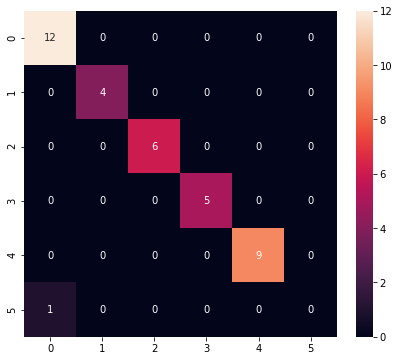

Classification Report
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         9
           5       0.00      0.00      0.00         1

    accuracy                           0.97        37
   macro avg       0.82      0.83      0.83        37
weighted avg       0.95      0.97      0.96        37



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [70]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [71]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)

In [72]:
# モデルを変換(量子化)
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\s3a1\AppData\Local\Temp\tmpim068i47\assets


INFO:tensorflow:Assets written to: C:\Users\s3a1\AppData\Local\Temp\tmpim068i47\assets


6480

# 推論テスト

In [73]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [74]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [75]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [76]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

Wall time: 0 ns


In [77]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[3.16615589e-03 3.11882934e-03 8.79460096e-01 1.23699615e-02
 1.01666540e-01 2.18533707e-04]
2
